## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils  import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')
train = pd.read_csv('/content/drive/MyDrive/train.csv')

## Explore Data

In [ ]:
print(f'Test Data Shape: {test.shape}')
print(f'Train Data Shape: {train.shape}')

Test Data Shape: (28000, 784)
Train Data Shape: (42000, 785)


In [ ]:
# Check for NaN values
print(f'Training Data Nan values: {train.isnull().sum().sum()}')
print(f'Testing Data Nan values:{test.isnull().sum().sum()}')

Training Data Nan values: 0
Testing Data Nan values:0


In [ ]:
# Fill NaN values with 0 (black pixel)
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [ ]:
len(test)

28000

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
train['label'].nunique()

10

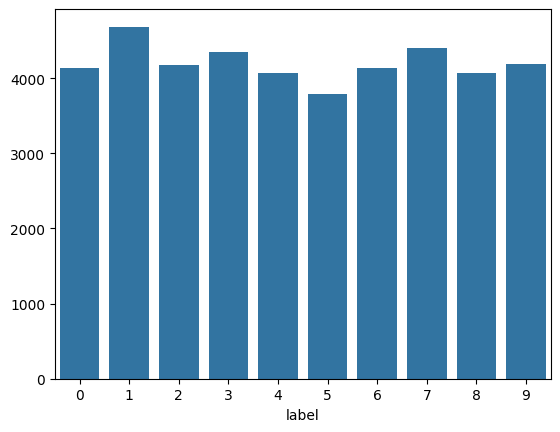

In [ ]:
sns.barplot(x = train['label'].value_counts().index, y =train['label'].value_counts().values)
plt.show()

In [ ]:
x_train = train.drop('label', axis = 1)
y_train = train['label']

In [ ]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'X_train Shape: {x_train.shape}')
print(f'y_train Data Shape: {y_train.shape}')

X_train Shape: (42000, 784)
y_train Data Shape: (42000,)


## Data Preprocessing

In [ ]:
X_train = x_train.values.reshape(x_train.shape[0],28, 28, 1)
X_test = test.values.reshape(test.shape[0],28, 28, 1)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
X_test[0].shape

(28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

Text(0.5, 1.0, '1')

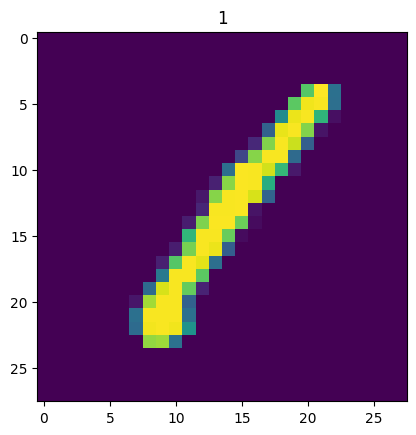

In [ ]:
plt.imshow(X_train[0])
plt.title(train['label'][0])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)

In [ ]:
print(f'X_train Shape: {x_train.shape}')
print(f'X_val Data Shape: {y_train.shape}')

X_train Shape: (42000, 784)
X_val Data Shape: (33600, 10)


## Model Architecture

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 12)          1740      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 12)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 64)                3

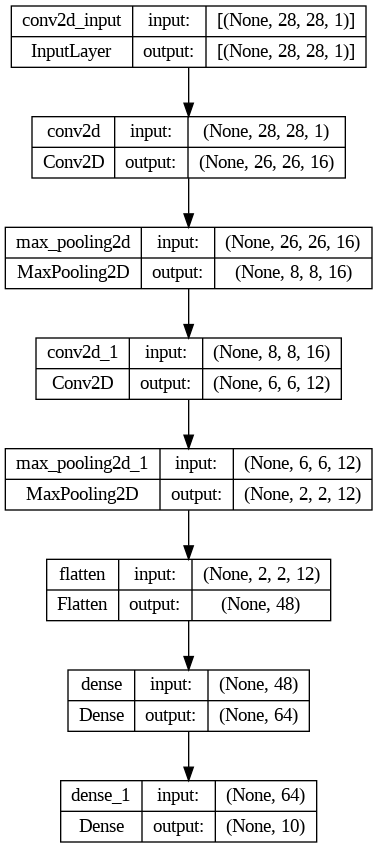

In [ ]:
plot_model(model, show_shapes = True)

## Compile and Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs= 20)

Epoch 1/20
1050/1050 [==============================] - 10s 5ms/step - loss: 0.4542 - accuracy: 0.8679 - val_loss: 0.1857 - val_accuracy: 0.9429
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1508 - accuracy: 0.9519 - val_loss: 0.1438 - val_accuracy: 0.9563
Epoch 3/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1194 - accuracy: 0.9627 - val_loss: 0.1209 - val_accuracy: 0.9624
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0985 - accuracy: 0.9684 - val_loss: 0.0995 - val_accuracy: 0.9668
Epoch 5/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0877 - accuracy: 0.9721 - val_loss: 0.0989 - val_accuracy: 0.9690
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0791 - val_accuracy

## Plotting Loss and Accuracy

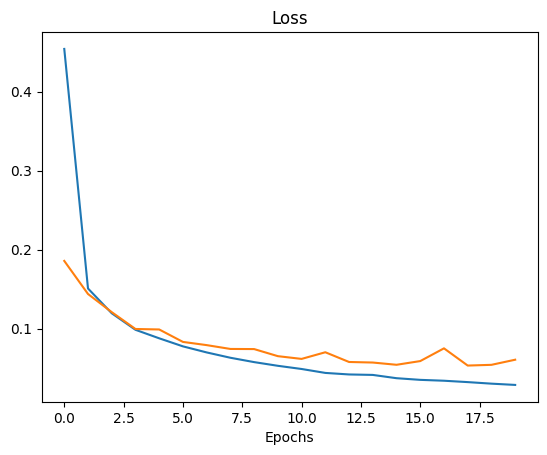

In [ ]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

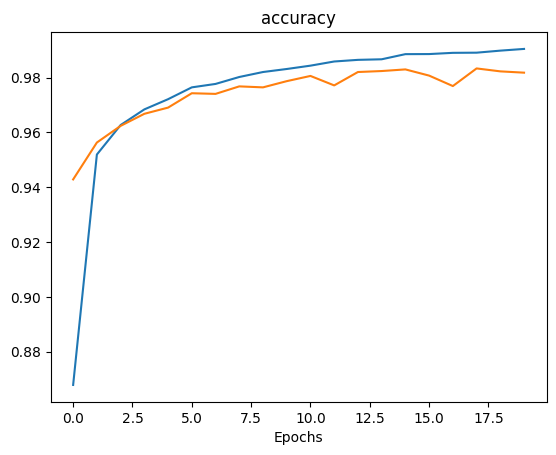

In [ ]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.show()

## Model Evaluation and Prediction

263/263 [==============================] - 1s 4ms/step


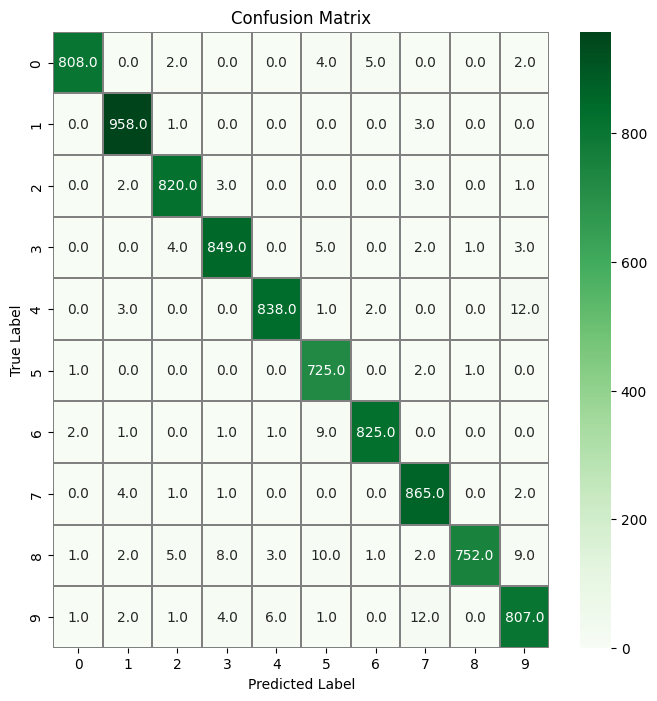

In [ ]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 378ms/step


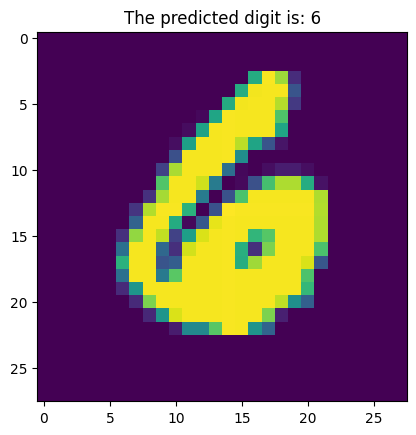

In [ ]:
plt.imshow(X_val[10])
prediction = model.predict(X_val[10].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
plt.title(f'The predicted digit is: {predicted_digit}')
plt.show()

1/1 [==============================] - 0s 70ms/step


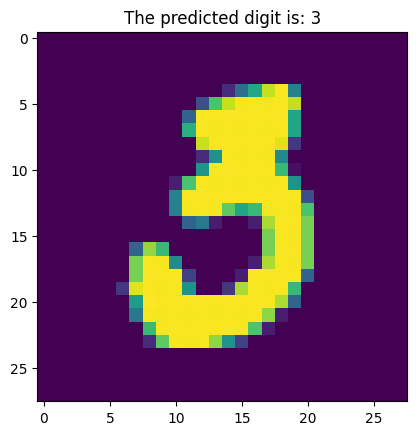

In [ ]:
plt.imshow(X_val[35])
prediction = model.predict(X_val[35].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
plt.title(f'The predicted digit is: {predicted_digit}')
plt.show()

In [ ]:
len(test)

28000

In [ ]:
X_test = test.values.reshape(test.shape[0], 28, 28, 1)
X_test = X_test / 255.0
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission

875/875 [==============================] - 2s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


1/1 [==============================] - 0s 30ms/step


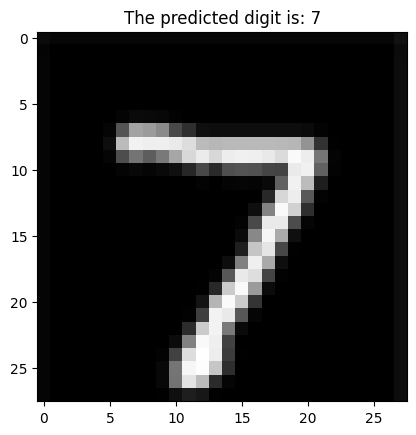

In [ ]:
# Load your image
image = Image.open('/content/drive/MyDrive/my_image.png')

# Preprocess the image
image = image.convert('L')
image = image.resize((28, 28))
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 28, 28, 1)

# Predict the digit
prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

# Show the image and the prediction
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'The predicted digit is: {predicted_digit}')
plt.show()
